In [ ]:
!pip install mlflow
!pip install pyngrok


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

In [4]:
# Set the experiment name to an experiment in the shared experiments folder
import mlflow
mlflow.set_experiment("/HCD")

2024/03/21 11:46:23 INFO mlflow.tracking.fluent: Experiment with name '/HCD' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/900091233515151996', creation_time=1711021583515, experiment_id='900091233515151996', last_update_time=1711021583515, lifecycle_stage='active', name='/HCD', tags={}>

In [5]:
import subprocess
from pyngrok import ngrok, conf
import getpass
from datetime import datetime

MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"
subprocess.Popen(["mlflow", "ui", "--backend-store-uri", MLFLOW_TRACKING_URI])

<Popen: returncode: None args: ['mlflow', 'ui', '--backend-store-uri', 'sqli...>

In [6]:
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
# mlflow will create an experiment if it doesn't exist
experiment_name = "/HCD"
run_name = datetime.now().strftime("%Y%m%d_%H%M%S")


In [7]:
print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()
port=5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"')

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth
··········
 * ngrok tunnel "https://939e-35-231-127-222.ngrok-free.app" -> "http://127.0.0.1:5000"


In [8]:
# Load the dataset
url = 'heart_statlog_cleveland_hungary_final.csv'
df = pd.read_csv(url)


In [9]:
df.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [10]:
df.tail(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [11]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [12]:
df.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [13]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

# Drop duplicate rows
df = df.drop_duplicates()

# Display data types and non-null counts
print(df.info())


age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
Number of duplicate rows: 272
<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  918 non-null    int64  
 1   sex                  918 non-null    int64  
 2   chest pain type      918 non-null    int64  
 3   resting bp s         918 non-null    int64  
 4   cholesterol          918 non-null    int64  
 5   fasting blood sugar  918 non-null    int64  
 6   resting ecg          918 non-null    int64  
 7   max heart rate       918 non-null    int64  
 8   exercise angina      918 non-null    int64  
 

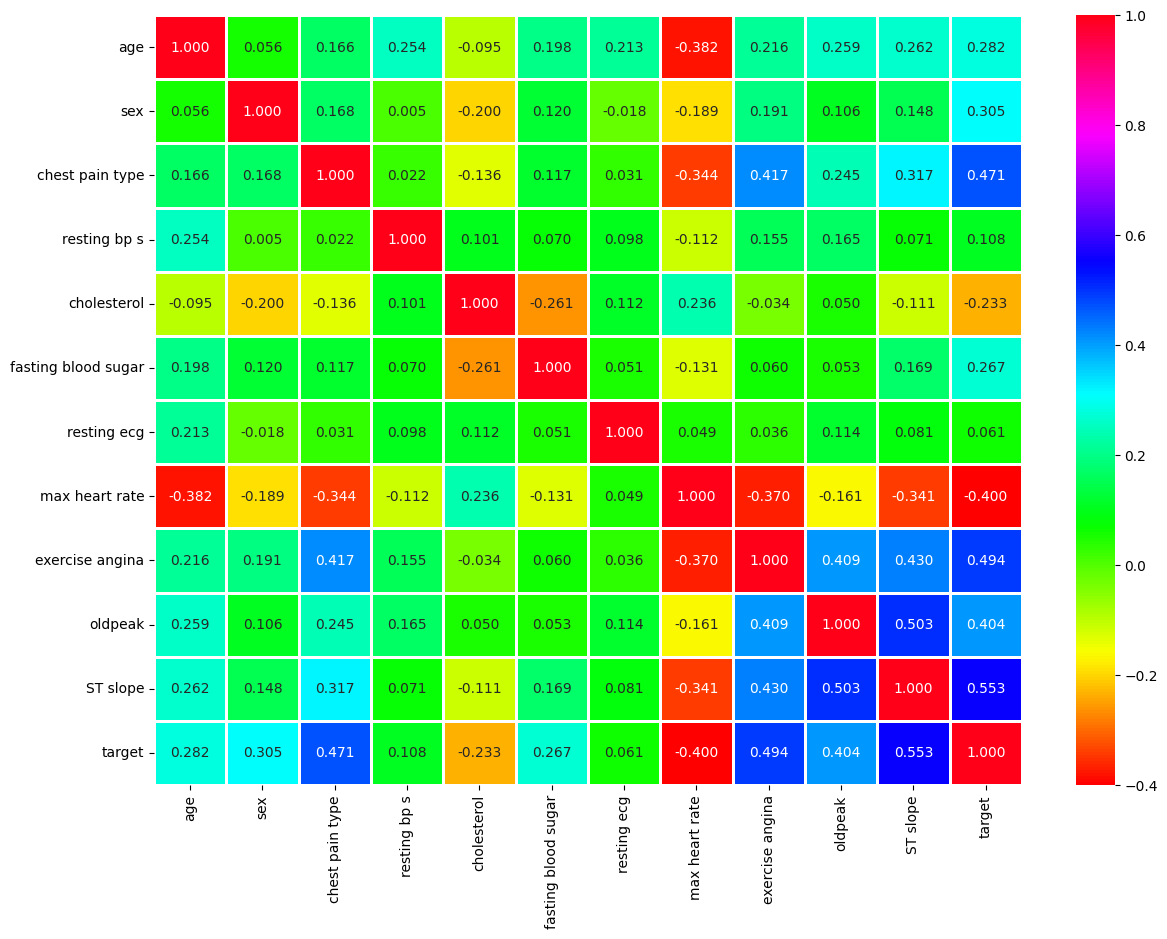

In [14]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [15]:
df.groupby('chest pain type',as_index=False)['target'].mean()

,chest pain type,target
0,1,0.434783
1,2,0.138728
2,3,0.354680
3,4,0.790323


In [16]:
df.groupby('target').mean()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
target,,,,,,,,,,,
0,50.551220,0.651220,2.763415,130.180488,227.121951,0.107317,0.548780,148.151220,0.134146,0.408049,1.260976
1,55.899606,0.901575,3.645669,134.185039,175.940945,0.334646,0.647638,127.655512,0.622047,1.274213,1.938976


In [17]:
df.groupby('ST slope',as_index=False)['target'].mean()

,ST slope,target
0,0,1.000000
1,1,0.197468
2,2,0.827887
3,3,0.777778


<ipython-input-18-1a697a4dfb87>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['target'],rug=True)


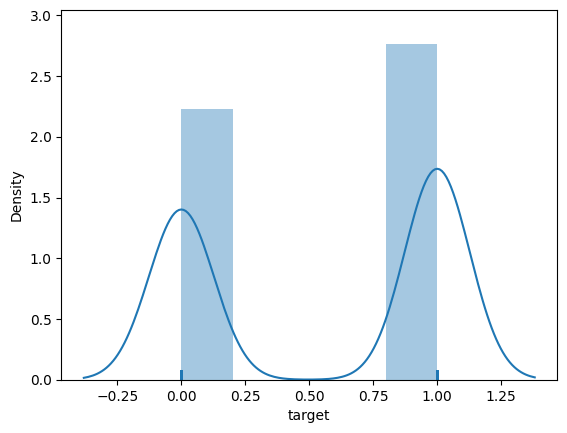

In [18]:
sns.distplot(df['target'],rug=True)
plt.show()

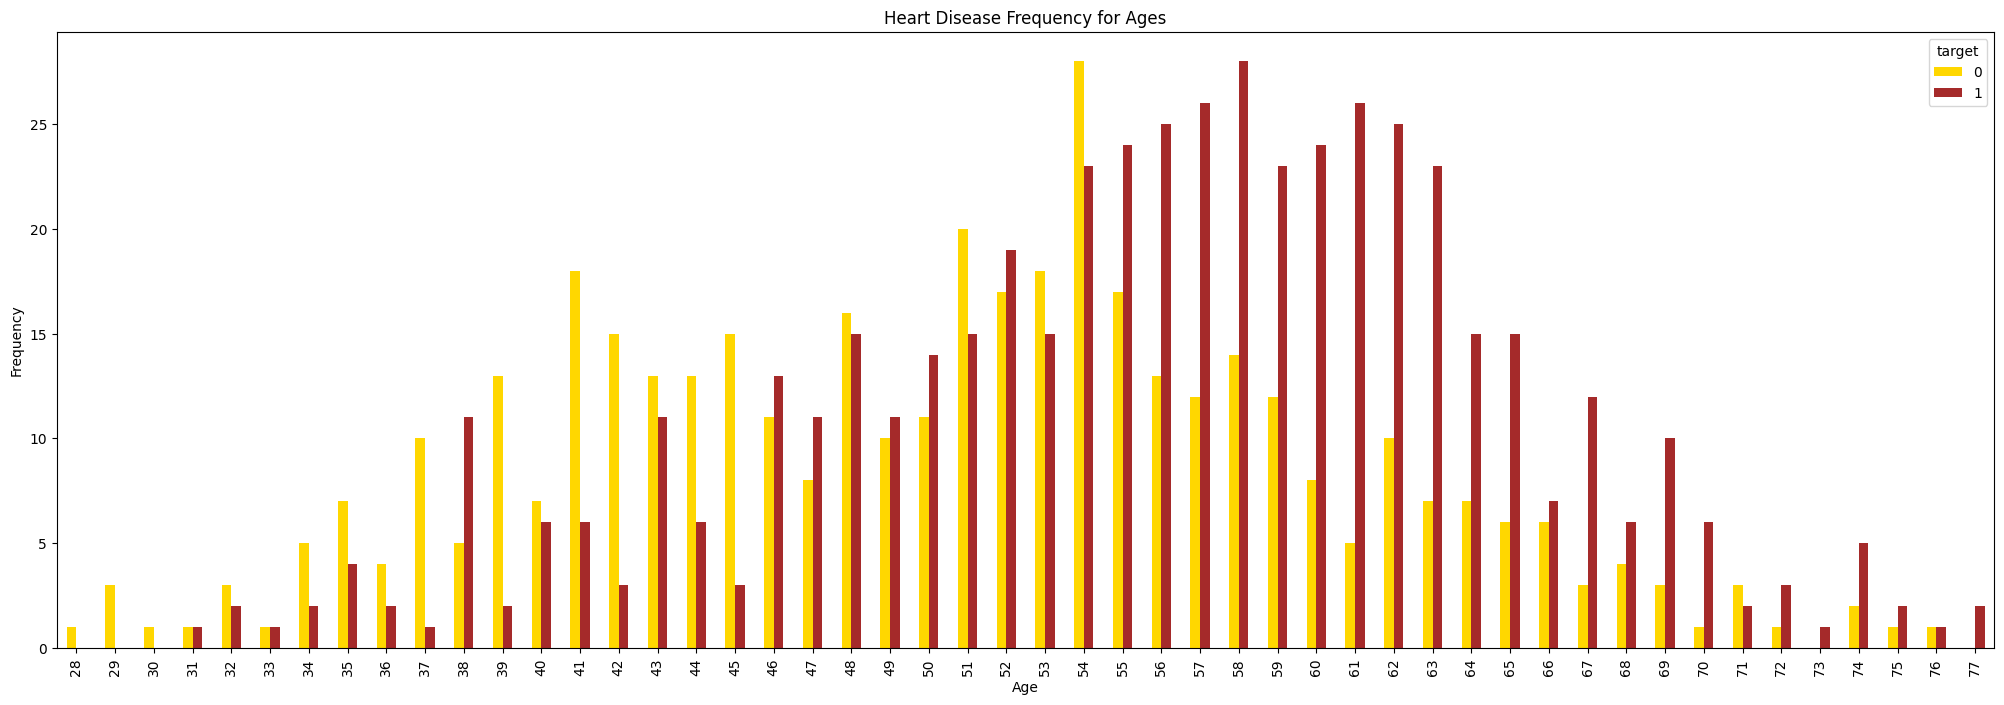

In [19]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(25,8),color=['gold','brown' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

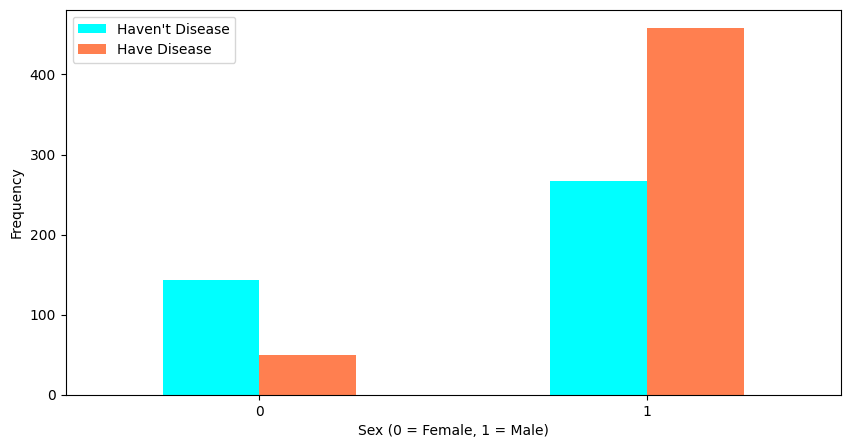

In [20]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,5),color=['cyan','coral' ])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()


In [21]:
columns= df.columns
print(columns)

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')


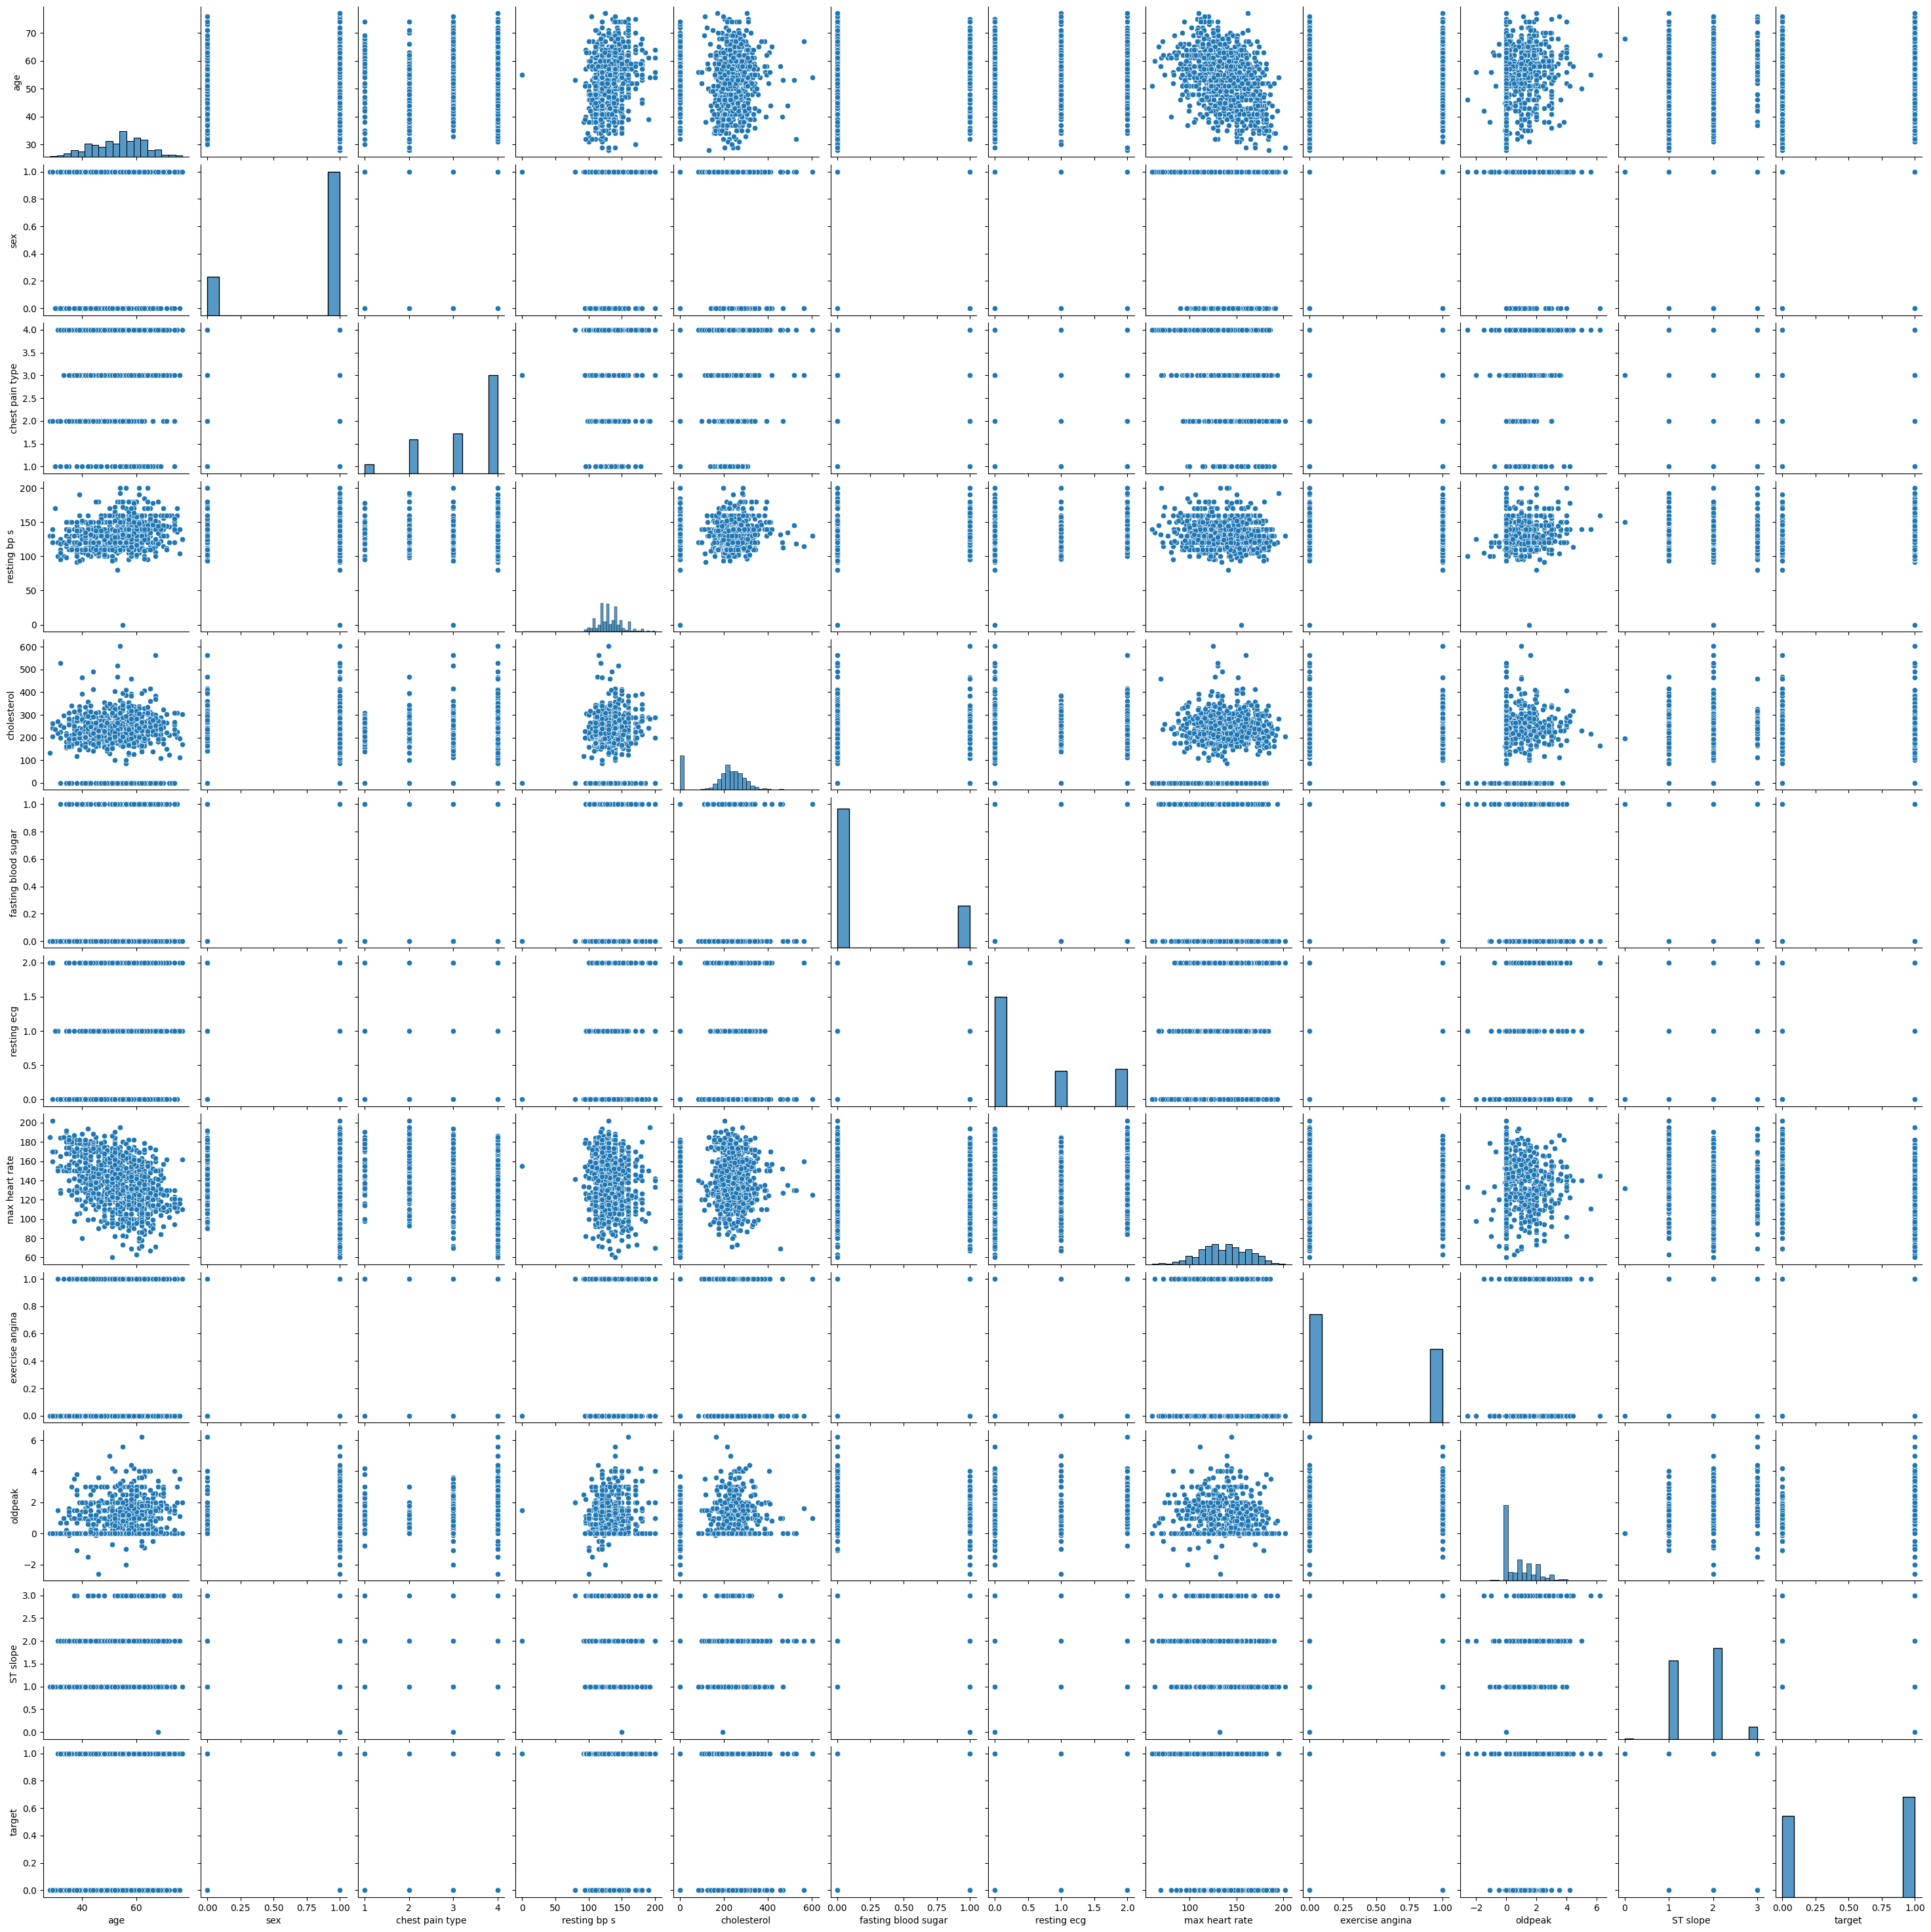

In [22]:
 sns.pairplot(data=df)

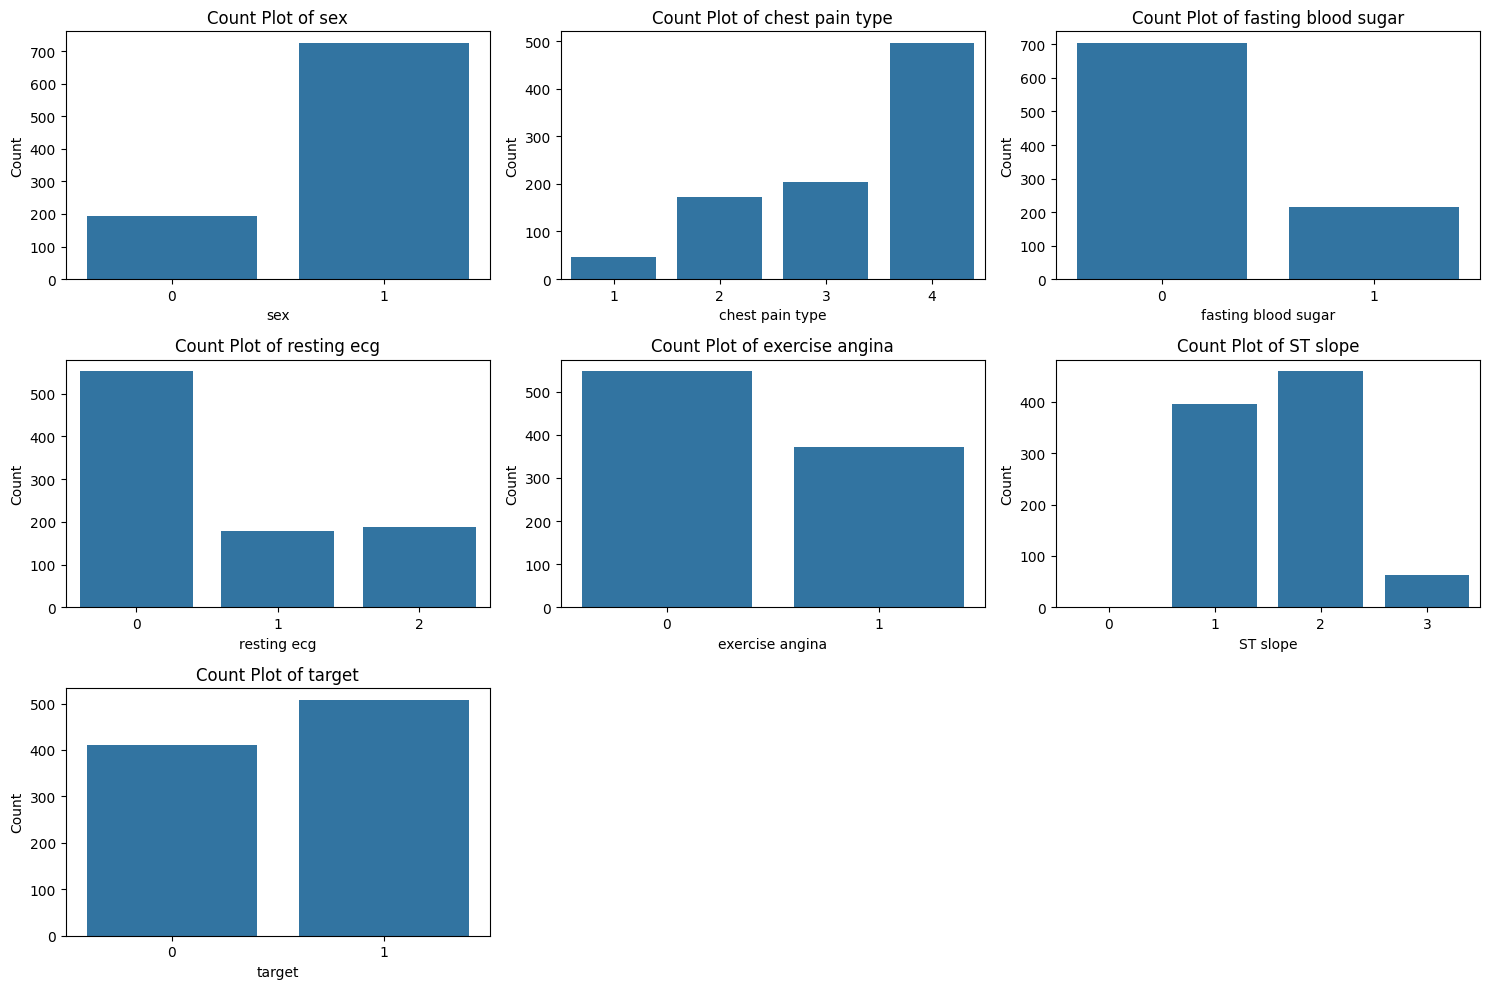

In [23]:
# Bar plots of categorical features
cat_features = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope', 'target']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=feature)
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

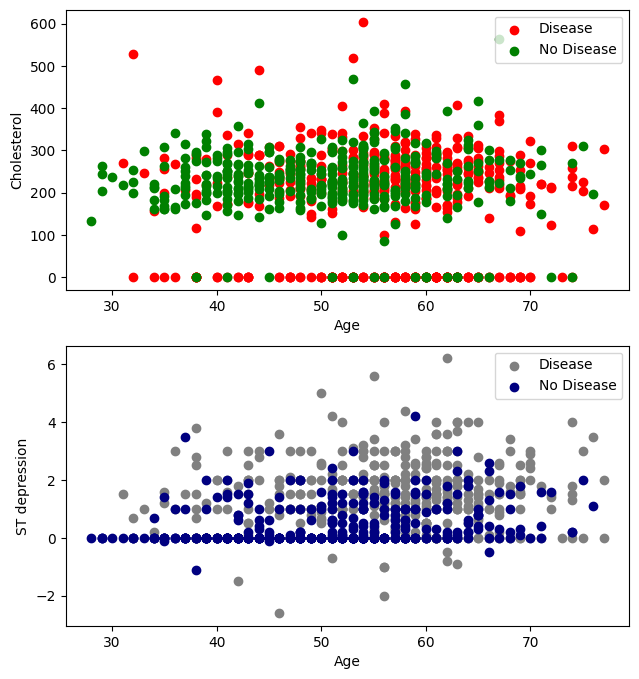

In [24]:
plt.figure(figsize=(16,8))


plt.subplot(2,2,2)
plt.scatter(x=df.age[df.target==1],y=df.cholesterol[df.target==1],c='red')
plt.scatter(x=df.age[df.target==0],y=df.cholesterol[df.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])


plt.subplot(2,2,4)
plt.scatter(x=df.age[df.target==1],y=df.oldpeak[df.target==1],c='grey')
plt.scatter(x=df.age[df.target==0],y=df.oldpeak[df.target==0],c='navy')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.legend(['Disease','No Disease'])
plt.show()

In [25]:
X = df.drop(['target'], axis = 1)
y = df.target.values

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your original dataset
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

# Split the dataset into train, validation, and test sets
train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Save the splits into CSV files
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Activation, Dropout, Flatten, Dense
# import keras
# from keras.models import Sequential
# from keras.layers import Dense
import warnings

In [30]:
# This code snippet builds and trains a neural network
#  using Keras, a high-level
# neural networks API running on top of TensorFlow.
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11, kernel_initializer='uniform', activation='relu', input_dim=11))

# Adding the second hidden layer
classifier.add(Dense(units=11, kernel_initializer='uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))


# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [31]:
history= classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,  validation_split=0.2)

Epoch 1/100
59/59 [==============================] - 1s 6ms/step - loss: 0.6895 - accuracy: 0.6388 - val_loss: 0.6806 - val_accuracy: 0.8095
Epoch 2/100
59/59 [==============================] - 0s 3ms/step - loss: 0.6313 - accuracy: 0.8416 - val_loss: 0.5712 - val_accuracy: 0.7959
Epoch 3/100
59/59 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.8416 - val_loss: 0.4439 - val_accuracy: 0.7959
Epoch 4/100
59/59 [==============================] - 0s 3ms/step - loss: 0.3680 - accuracy: 0.8535 - val_loss: 0.4219 - val_accuracy: 0.8027
Epoch 5/100
59/59 [==============================] - 0s 3ms/step - loss: 0.3456 - accuracy: 0.8552 - val_loss: 0.4211 - val_accuracy: 0.8231
Epoch 6/100
59/59 [==============================] - 0s 3ms/step - loss: 0.3383 - accuracy: 0.8620 - val_loss: 0.4187 - val_accuracy: 0.8231
Epoch 7/100
59/59 [==============================] - 0s 3ms/step - loss: 0.3346 - accuracy: 0.8637 - val_loss: 0.4194 - val_accuracy: 0.8231
Epoch 8/100
5

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 59}

In [34]:
history.history['accuracy']

[0.6388415694236755,
 0.8415672779083252,
 0.8415672779083252,
 0.8534923195838928,
 0.855195939540863,
 0.8620102405548096,
 0.863713800907135,
 0.8671209812164307,
 0.8739352822303772,
 0.8773424029350281,
 0.8790460228919983,
 0.8807495832443237,
 0.8807495832443237,
 0.8790460228919983,
 0.8841567039489746,
 0.8807495832443237,
 0.8807495832443237,
 0.8824531435966492,
 0.8875638842582703,
 0.8841567039489746,
 0.8858603239059448,
 0.8875638842582703,
 0.8858603239059448,
 0.8858603239059448,
 0.8858603239059448,
 0.8875638842582703,
 0.8858603239059448,
 0.8875638842582703,
 0.8858603239059448,
 0.8875638842582703,
 0.8875638842582703,
 0.8875638842582703,
 0.8875638842582703,
 0.8892674446105957,
 0.8892674446105957,
 0.8875638842582703,
 0.8909710645675659,
 0.8909710645675659,
 0.8943781852722168,
 0.8926746249198914,
 0.8960817456245422,
 0.8960817456245422,
 0.8960817456245422,
 0.8960817456245422,
 0.8977853655815125,
 0.8960817456245422,
 0.8943781852722168,
 0.897785365581

In [35]:
accuracy=history.history['accuracy']
validation_acc=history.history['val_accuracy']
loss=history.history['loss']
validation_loss=history.history['val_loss']

In [36]:
mlflow.end_run()
mlflow.set_experiment(experiment_name)
with mlflow.start_run(run_name = run_name) as mlflow_run:

    mlflow.set_experiment_tag("base_model", "classifier")
    mlflow.set_tag("optimizer", "keras.optimizers.Adam")
    mlflow.set_tag("loss", "sparse_categorical_crossentropy")


    # Log metrics
    mlflow.log_metrics({
        "train_loss": history.history["loss"][-1],
        "train_accuracy": history.history["accuracy"][-1],
        "val_loss": history.history["val_loss"][-1],
        "val_accuracy": history.history["val_accuracy"][-1]
    })

    # Save the model with MLflow
    mlflow.keras.log_model(classifier, "keras_model")

    # # You can also log additional artifacts, such as model summary
    # with mlflow.start_run():
    #   classifier.summary()
    #   mlflow.log_artifact("model_summary.txt")



2024/03/21 11:52:54 INFO mlflow.tracking.fluent: Experiment with name '/HCD' does not exist. Creating a new experiment.
2024/03/21 11:52:54 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/03/21 11:53:16 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpxs_9zu0r/model, flavor: tensorflow). Fall back to return ['tensorflow==2.15.0', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback. 
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [37]:
print("Shape of input data:", X_train.shape[1])
#

Shape of input data: 11


In [38]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

6/6 [==============================] - 0s 2ms/step


accuracy of the model:  0.8315217391304348


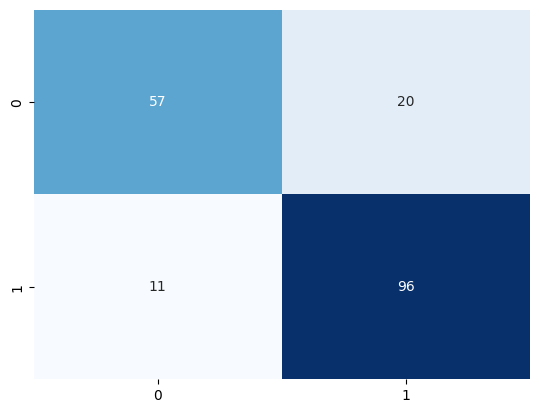

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)


RandomForest_accuracy: 0.842391304347826


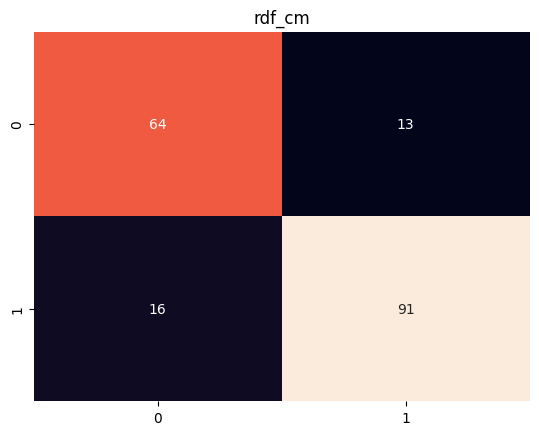

In [40]:
from sklearn.ensemble import RandomForestClassifier
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)
plt.title("rdf_cm")
sns.heatmap(rdf_cm,annot=True,fmt="d",cbar=False)
print('RandomForest_accuracy:',rdf_ac)

<Figure size 640x480 with 0 Axes>

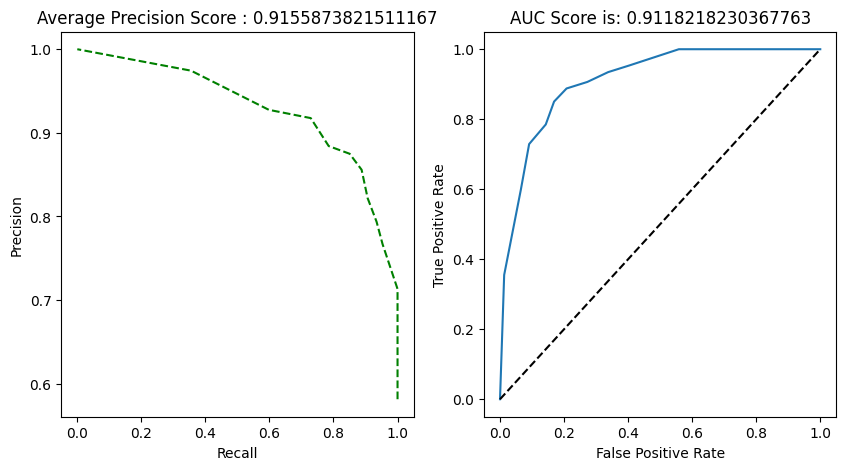

<Figure size 640x480 with 0 Axes>

In [41]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
%matplotlib inline
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
plotting(y_test,rdf_c.predict_proba(X_test))
plt.figure()


Text(0.5, 1.0, 'Model Accuracy')

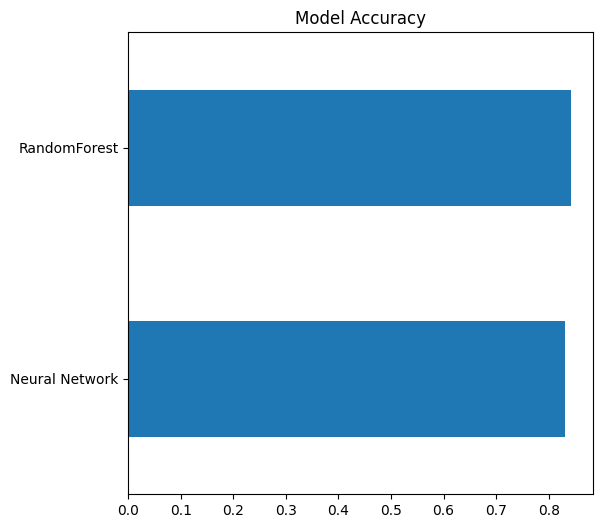

In [42]:
model_accuracy = pd.Series(data=[rdf_ac,ac],
        index=['RandomForest','Neural Network'])
fig= plt.figure(figsize=(6,6))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')

SAVE THE MODEL

In [ ]:
# #import tensorflow as tf
# import tempfile
# import os

# # Assuming x, y, and z are your input/output tensors and export_dir is the directory to save the model
# #simple_save(session,
#     #export_dir,
#     #inputs={"x": x, "y": y},
#    # outputs={"z": z}
# #)


In [ ]:
# #obtain a temporary storage directory
# Model_Directory= tempfile.gettempdir()

In [ ]:
# Model_Directory

In [43]:
import tensorflow as tf

In [ ]:
pip install tensorflow==2.15.0


In [44]:
import tempfile
import os

# Obtain a temporary storage directory
Model_Directory = tempfile.gettempdir()

# Define the new directory path
new_export_path = os.path.join(Model_Directory, "saved_model")

# Create the directory if it doesn't exist
if not os.path.exists(new_export_path):
    os.makedirs(new_export_path)

# Version
version = 1

# Join the new directory path with the version number
export_path = os.path.join(new_export_path, str(version))

# Print the export path
print('export_path = {}\n'.format(export_path))

# Save the model to the new export path
tf.keras.models.save_model(
    classifier,
    export_path,
)


export_path = /tmp/saved_model/1



In [ ]:
# #version
# version = 1

In [ ]:
# # join the temp mode director with the version number
# import os
# export_path = os.path.join(Model_Directory, str(version))
# print('export_path = {}\n' .format(export_path))

In [ ]:
# pip install tensorflow==2.15.0


In [ ]:
# #save the model
# #if directory exists, well remove it
# #rm removes every file specified on the command line
# import tensorflow as tf
# if os.path.isdir(export_path):
#   print('\n Already saved a model, cleaning up \n')
#   !rm -r {export_path}
# tf.keras.models.save_model(
#     classifier,
#     export_path,
# )

In [45]:
!ls -l {export_path}

total 116
drwxr-xr-x 2 root root  4096 Mar 21 11:54 assets
-rw-r--r-- 1 root root    55 Mar 21 11:54 fingerprint.pb
-rw-r--r-- 1 root root  9039 Mar 21 11:54 keras_metadata.pb
-rw-r--r-- 1 root root 90933 Mar 21 11:54 saved_model.pb
drwxr-xr-x 2 root root  4096 Mar 21 11:54 variables


In [ ]:
# prompt: view saved model

!saved_model_cli show --dir {export_path} --all


2024-03-17 20:12:46.599921: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-17 20:12:46.599983: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-17 20:12:46.601144: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-17 20:12:47.916716: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the followin

In [46]:
import sys
# We need sudo prefix if not on a Google Colab.
if 'google.colab' not in sys.modules:
  SUDO_IF_NEEDED = 'sudo'
else:
  SUDO_IF_NEEDED = ''

In [47]:
# This is the same as you would do from your command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | {SUDO_IF_NEEDED} tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | {SUDO_IF_NEEDED} apt-key add -
!{SUDO_IF_NEEDED} apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key is deprecated. Manage keyring files in trusted.gpg.d instead (see apt-key(8)).
100  2943  100  2943    0     0  15055      0 --:--:-- --:--:-- --:--:-- 15015
OK
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,026 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]


In [48]:
# TODO: Use the latest model server version when colab supports it.
#!{SUDO_IF_NEEDED} apt-get install tensorflow-model-server
# We need to install Tensorflow Model server 2.8 instead of latest version
# Tensorflow Serving >2.9.0 required `GLIBC_2.29` and `GLIBCXX_3.4.26`. Currently colab environment doesn't support latest version of`GLIBC`,so workaround is to use specific version of Tensorflow Serving `2.8.0` to mitigate issue.
!wget 'http://storage.googleapis.com/tensorflow-serving-apt/pool/tensorflow-model-server-2.8.0/t/tensorflow-model-server/tensorflow-model-server_2.8.0_all.deb'
!dpkg -i tensorflow-model-server_2.8.0_all.deb
!pip3 install tensorflow-serving-api==2.8.0

--2024-03-21 11:55:31--  http://storage.googleapis.com/tensorflow-serving-apt/pool/tensorflow-model-server-2.8.0/t/tensorflow-model-server/tensorflow-model-server_2.8.0_all.deb
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.207, 108.177.12.207, 108.177.13.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 340152790 (324M) [application/x-debian-package]
Saving to: ‘tensorflow-model-server_2.8.0_all.deb’

tensorflow-model-se 100%[===================>] 324.39M  98.0MB/s    in 3.5s    

2024-03-21 11:55:35 (91.8 MB/s) - ‘tensorflow-model-server_2.8.0_all.deb’ saved [340152790/340152790]

Selecting previously unselected package tensorflow-model-server.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack tensorflow-model-server_2.8.0_all.deb ...
Unpacking tensorflow-model-server (2.8.0) ...
Setting up tensorflow-model-

In [49]:
os.environ["export_path"] = export_path

In [50]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=Heart Disease prediction \
  --model_base_path="${export_path}" >server.log 2>&1


In [51]:
!tail server.log

	--num_unload_threads=0           	int32	The number of threads in the thread-pool used to unload servables. If set as 0, we don't use a thread-pool, and servable loads are performed serially in the manager's main work loop, may casue the Serving request to be delayed. Default: 0
	--max_num_load_retries=5         	int32	maximum number of times it retries loading a model after the first failure, before giving up. If set to 0, a load is attempted only once. Default: 5
	--load_retry_interval_micros=60000000	int64	The interval, in microseconds, between each servable load retry. If set negative, it doesn't wait. Default: 1 minute
	--file_system_poll_wait_seconds=1	int32	Interval in seconds between each poll of the filesystem for new model version. If set to zero poll will be exactly done once and not periodically. Setting this to negative value will disable polling entirely causing ModelServer to indefinitely wait for a new model at startup. Negative values are reserved for testing purposes 

In [ ]:
!pip install tensorflow-io

In [ ]:
!pip install tensorflow==2.15

In [52]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
!pip install tf-keras==2.16


  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
  Using cached ml_dtypes-0.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached keras-3.0.5-py3-none-any.whl (1.0 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [57]:
!tail server.log

2024-03-21 11:58:46.605054: W tensorflow_serving/sources/storage_path/file_system_storage_path_source.cc:268] No versions of servable Heart found under base path /tmp/saved_model/1. Did you forget to name your leaf directory as a number (eg. '/1/')?
2024-03-21 11:58:47.605119: W tensorflow_serving/sources/storage_path/file_system_storage_path_source.cc:268] No versions of servable Heart found under base path /tmp/saved_model/1. Did you forget to name your leaf directory as a number (eg. '/1/')?
2024-03-21 11:58:48.605195: W tensorflow_serving/sources/storage_path/file_system_storage_path_source.cc:268] No versions of servable Heart found under base path /tmp/saved_model/1. Did you forget to name your leaf directory as a number (eg. '/1/')?
2024-03-21 11:58:49.605276: W tensorflow_serving/sources/storage_path/file_system_storage_path_source.cc:268] No versions of servable Heart found under base path /tmp/saved_model/1. Did you forget to name your leaf directory as a number (eg. '/1/')?


In [ ]:
!pip install tensorflow-serving-client

In [ ]:
!pip install tensorflow-serving-api

In [53]:
!saved_model_cli show --dir {export_path} --all

2024-03-21 11:56:31.896771: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-21 11:56:31.896851: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-21 11:56:31.899935: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-21 11:56:35.232431: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the followin

In [54]:
os.environ["new_export_path"] = new_export_path

In [55]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=classifier \
  --model_base_path="${new_export_path}" >server.log 2>&1


In [56]:
!tail server.log

	when importing GraphDef to MLIR module in GrapplerHook
2024-03-21 11:58:25.495955: E external/org_tensorflow/tensorflow/core/framework/node_def_util.cc:630] NodeDef mentions attribute debug_name which is not in the op definition: Op<name=VarHandleOp; signature= -> resource:resource; attr=container:string,default=""; attr=shared_name:string,default=""; attr=dtype:type; attr=shape:shape; attr=allowed_devices:list(string),default=[]; is_stateful=true> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node Adam/m/dense/bias}}
2024-03-21 11:58:25.506343: E external/org_tensorflow/tensorflow/core/grappler/optimizers/meta_optimizer.cc:828] tfg_optimizer{} failed: NOT_FOUND: Op type not registered 'DisableCopyOnRead' in binary running on 74ca6fa05496. Make sure the Op and Kernel are registered in the binary running in this process. Note that if you are loading a saved graph which used ops from tf.contrib, accessing 

In [ ]:
# !tensorflow_model_server \
#   --rest_api_port=8501 \
#   --model_name=classifier \
#   --model_base_path="/tmp/saved_model"


In [58]:
import requests
import json

# Define the address of your TensorFlow Serving server
server_url = 'http://localhost:8501/v1/models/classifier:predict'  # Update with your server's address

# Assuming the last column is the target variable, exclude it to keep only the features
features_only_data = test_data.iloc[:, :-1]  # Exclude the last column

# Convert the DataFrame to a list of lists
input_data = features_only_data.values.tolist()

# Prepare data for prediction request
data_to_predict = {"signature_name": "serving_default", "instances": input_data[0:3]}  # Taking the first 3 samples as an example

# Send prediction request
response = requests.post(server_url, json=data_to_predict)

# Print predictions
predictions = response.json()
print("Predictions:")
print(predictions)


Predictions:
{'predictions': [[0.530885279], [0.530885279], [0.530885279]]}


In [ ]:
# print("Shape of test_data:", test_data.shape)
